In [344]:
import rebound
from numpy import *
import datetime
import numpy as np
from scipy import interpolate
from scipy.optimize import newton
%matplotlib inline
import matplotlib
from matplotlib.pyplot import *
date = datetime.datetime(2017, 12, 21, 0, 0)#datetime.datetime(2017, 7, 9, 11, 4)#datetime.datetime(2000, 7, 9, 11, 4)
sim = rebound.Simulation()
sim.add("Sun", date=date)
sim.add("Earth", date=date)


Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).


In [54]:
sim.add(m=0.,x=xast1,y=yast1,z=zast1,vx=vast[0]*year/(AU*2.*pi),vy=vast[1]*year/(AU*2.*pi)
        ,vz=vast[2]*year/(AU*2.*pi),
        hash="asteroid",date=date)


In [345]:
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs
print ps[1]

<rebound.Particle object, m=3.04043264802e-06 x=0.0180502642182 y=0.989721690309 z=-0.000163227733652 vx=-1.01660455221 vy=0.013027716195 vz=1.16234028515e-05>


In [57]:
Noutputs = 5000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,3.*year, Noutputs)
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))
z = np.zeros((2,Noutputs))
sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[1].y
    z[0][i] = ps[1].z
    
    x[1][i] = ps[2].x
    y[1][i] = ps[2].y
    z[1][i] = ps[2].z

In [68]:
def getmag(H,dbs,dbo,dos):
    chi = arccos((dbo**2+dbs**2-dos**2)/(2.*dbo*dbs))
    pchi = 2./3.*((1.-chi/pi)*cos(chi)+1./pi*sin(chi))
    return H+2.5*log10(dbs*dbs*dbo*dbo/(pchi*dos**4))
mags=[]
for i,time in enumerate(times):
    magarray = getmag(22.4,sqrt(x[1][i]**2+y[1][i]**2+z[1][i]**2),
                 sqrt((x[1][i]-x[0][i])**2+(y[1][i]-y[0][i])**2+(z[1][i]-z[0][i])**2),1.)
    mags.append(magarray)

/anaconda/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  


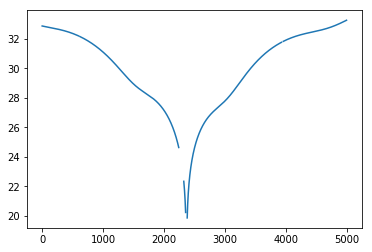

In [70]:
#scatter(x[0],y[0])
#scatter(x[1],y[1])
plot(mags)

In [503]:
h=loadtxt('/Users/darrylseligman/Desktop/Yale/Oumuamua/distribution_funtion/hist_unfocused')
xedges=loadtxt('/Users/darrylseligman/Desktop/Yale/Oumuamua/distribution_funtion/xedges_unfocused')
yedges=loadtxt('/Users/darrylseligman/Desktop/Yale/Oumuamua/distribution_funtion/yedges_unfocused')
hist = loadtxt('/Users/darrylseligman/Desktop/Yale/Oumuamua/distribution_funtion/hist')
bin_edges=loadtxt('/Users/darrylseligman/Desktop/Yale/Oumuamua/distribution_funtion/bin_edges')

In [23]:
print xedges
print yedges

[  12.86045234   20.06041838   27.26038442   34.46035045   41.66031649
   48.86028252   56.06024856   63.2602146    70.46018063   77.66014667
   84.8601127    92.06007874   99.26004478  106.46001081  113.65997685
  120.85994288  128.05990892  135.25987496  142.45984099  149.65980703
  156.85977306  164.0597391   171.25970514  178.45967117  185.65963721
  192.85960324  200.05956928  207.25953532  214.45950135  221.65946739
  228.85943342  236.05939946  243.2593655   250.45933153  257.65929757
  264.8592636   272.05922964  279.25919568  286.45916171  293.65912775
  300.85909378  308.05905982  315.25902586  322.45899189  329.65895793
  336.85892396  344.05889     351.25885604  358.45882207  365.65878811
  372.85875414]
[ -8.99891450e+01  -8.63894694e+01  -8.27897938e+01  -7.91901182e+01
  -7.55904426e+01  -7.19907670e+01  -6.83910914e+01  -6.47914158e+01
  -6.11917402e+01  -5.75920646e+01  -5.39923890e+01  -5.03927134e+01
  -4.67930377e+01  -4.31933621e+01  -3.95936865e+01  -3.59940109e+0

In [31]:
from datetime import timedelta
k=0
year = 60*60*24*365
while(k==0):
    xd=xedges[-1]*random.random()
    yd = (random.random()-.5)*2.*yedges[-1]
    xidx = (abs(xedges-xd)).argmin()
    yidx = (abs(yedges-yd)).argmin()
    if (xidx<50) and (yidx<50):
        thresh= h[xidx,yidx]
        throwout=random.random()*amax(h)
        if throwout<thresh:
            break
#xd and yd are the ra and dec in degrees of the incoming trajectory

xd = xd+180.
yd = yd+90
print('xd,yd=',xd,yd)
#choose a speed from the distribution
k=0
while(k==0):
    vMC=bin_edges[-2]*random.random()
    idx = (abs(bin_edges-vMC)).argmin()
    thresh= hist[idx]
    throwout=random.random()*amax(hist)
    if throwout<thresh:
        break
print('vmc=',vMC)
#choose an impact parameter from b^2

k=0
while(k==0):
    bMC=3.*random.random()
    #idx = (abs(bin_edges-vMC)).argmin()
    thresh= bMC*bMC
    throwout=random.random()*3.*3.
    if throwout<thresh:
        break
print('bmc=',bMC)
#choose a psi for the plane
psi = random.random()*2.*pi
print psi
# choose a start date and position for the earth
phiearth = random.random()*2.*pi
date = datetime.datetime(2017, 9, 21, 0, 0)
print phiearth
date1 = date+timedelta(seconds=year*phiearth/(2.*pi))
print date1
xearth = cos(phiearth)*1.
yearth = sin(phiearth)*1.
zearth = 0.
print xearth,yearth,zearth
vearth = 29.8*array([-sin(phiearth),cos(phiearth),0.])
print vearth
#get the x,y,z position of the asteroid
# phi = 0 corresponds to ra 0 pointing to vernal equinox

def get_pos(x,y,z,bMC,psi):
    phi = arctan2(y,x)
    theta = arctan2(sqrt(x*x+y*y),z)
    
    #d = array([[cos(phi),sin(phi),0],[-sin(phi),cos(phi),0],[0,0,1]])
    #c = array([[1,0,0],[0,cos(theta),sin(theta)],[0,-sin(theta),cos(theta)]])
    
    #dinv = inv(d)
    #cinv=inv(c)
    #rot = matmul(cinv,dinv)
    deltaxp = bMC*cos(psi)
    deltayp = bMC*sin(psi)
    dx = sin(phi)*deltaxp+cos(theta)*cos(phi)*deltayp
    dy  = -cos(phi)*deltaxp+cos(theta)*sin(phi)*deltayp
    dz = -sin(theta)*deltayp
    return(x+dx,y+dy,z+dz)
phi =radians(xd)
theta = radians(yd)
print phi
print theta
xast = 10.*cos(phi)*sin(theta)
yast = 10.*sin(phi)*sin(theta)
zast = 10.*cos(theta)
print xast,yast,zast
xast1,yast1,zast1 = get_pos(xast,yast,zast,bMC,psi)
print xast1,yast1,zast1
vast = -vMC*1./sqrt(xast1*xast1+yast1*yast1+zast1*zast1)*array([xast1,yast1,zast1])
print vast

('xd,yd=', 417.73268483126117, 80.926049020311083)
('vmc=', 29.392215179105886)
('bmc=', 2.8757707193229782)
0.0974290148561
0.566147953593
2017-10-23 21:19:19.016908
0.84397341155 0.536385011532 0.0
[-15.98427334  25.15040766   0.        ]
7.2908107435
1.41242600603
5.2718901775 8.34984771874 1.57709131955
7.71556668712 6.85914520234 1.30085165178
[-21.79445255 -19.37528645  -3.67456478]


In [47]:
AU=1.49597892e13/1e5 
year = 60.*60.*24.*365.
print year
print AU/(2.*pi*year)
print year/AU

31536000.0
0.754986174148
0.210805109473


In [424]:
def doadraw(h,xedges,yedges,hist,bin_edges):
    k=0
    year = 60*60*24*365
    while(k==0):
        xd=xedges[-1]*random.random()
        yd = (random.random()-.5)*2.*yedges[-1]
        xidx = (abs(xedges-xd)).argmin()
        yidx = (abs(yedges-yd)).argmin()
        if (xidx<50) and (yidx<50):
            thresh= h[xidx,yidx]
            throwout=random.random()*amax(h)
            if throwout<thresh:
                break
#xd and yd are the ra and dec in degrees of the incoming trajectory

    xd = xd+180.
    yd = yd+90
    #choose a speed from the distribution
    k=0
    while(k==0):
        vMC=bin_edges[-2]*random.random()
        idx = (abs(bin_edges-vMC)).argmin()
        thresh= hist[idx]
        throwout=random.random()*amax(hist)
        if throwout<thresh:
            break
    #choose an impact parameter from b^2

    k=0
    while(k==0):
        bMC=10.*random.random()
        #idx = (abs(bin_edges-vMC)).argmin()
        thresh= bMC*bMC
        throwout=random.random()*10.*10.
        if throwout<thresh:
            break
    psi = random.random()*2.*pi
    # choose a start date and position for the earth
    phiearth = random.random()*2.*pi
    date = datetime.datetime(2017, 9, 21, 0, 0)
    date1 = date+timedelta(seconds=year*phiearth/(2.*pi))
    xearth = cos(phiearth)*1.
    yearth = sin(phiearth)*1.
    zearth = 0.
    
    vearth = year/(AU*2.*pi)*29.8*array([-sin(phiearth),cos(phiearth),0.])
    phi =radians(xd)
    theta = radians(yd)
    
    xast = 10.*cos(phi)*sin(theta)
    yast = 10.*sin(phi)*sin(theta)
    zast = 10.*cos(theta)
    
    xast1,yast1,zast1 = get_pos(xast,yast,zast,bMC,psi)
    
    vast = -vMC*1./sqrt(xast*xast+yast*yast+zast*zast)*array([xast,yast,zast])
    sim = rebound.Simulation()
    #sim.add("Sun", date=date1)
    #sim.add("Earth", date=date1)
    #sim.add(m=3e-6,r=5e-5,a=1,e=0.05,f=np.pi,hash='earth')
    sim.add(m=1.e-3,x=xearth,y=yearth,z=zearth,vx=vearth[0]
            ,vy=vearth[1],vz=vearth[2],hash='earth')
    sim.add(m=1.,x=0.,y=0.,z=0.,vx=0.,vy=0.,vz=0.,hash="sun",date=date1)
    #sim.add(m=0.,x=1.,y=0.,z=0.,vx=0.,vy=0.,vz=0.,hash="earth",date=date1)
    sim.add(m=0.,x=xast1,y=yast1,z=zast1,vx=vast[0]*year/(AU*2.*pi),vy=vast[1]*year/(AU*2.*pi)
        ,vz=vast[2]*year/(AU*2.*pi),
        hash="asteroid",date=date1)
    Noutputs = 1000
    year = 2.*np.pi # One year in units where G=1
    times = np.linspace(0.,3.*year, Noutputs)
    x = np.zeros((2,Noutputs))
    y = np.zeros((2,Noutputs))
    z = np.zeros((2,Noutputs))
    sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
    sim.move_to_com()        # We always move to the center of momentum frame before an integration
    ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs
    mags=[]
  
    
    for i,time in enumerate(times):
        sim.integrate(time)
        x[0][i] = ps[0].x   # This stores the data which allows us to plot it later
        y[0][i] = ps[0].y
        z[0][i] = ps[0].z
    
        x[1][i] = ps[2].x
        y[1][i] = ps[2].y
        z[1][i] = ps[2].z
        magarray = getmag(22.4,sqrt(x[1][i]**2+y[1][i]**2+z[1][i]**2),
                 sqrt((x[1][i]-x[0][i])**2+(y[1][i]-y[0][i])**2+(z[1][i]-z[0][i])**2),1.)
        mags.append(magarray)
    return(mags,x,y,z,phiearth,vMC,bMC)
magss,x,y,z,phiearth,vMC,bMC = doadraw(h,xedges,yedges,hist,bin_edges)

In [327]:
import time

start = time.time()



k=0
maglist =[]
xlist=[]
ylist=[]
zlist=[]
daterlist = []
vMClist = []
bMClist = []
while(k<10000):
    k+=1
    magss,x,y,z,dater,vMC,bMC = doadraw(h,xedges,yedges,hist,bin_edges)
    maglist.append(magss)
    xlist.append(x)
    ylist.append(y)
    zlist.append(z)
    daterlist.append(dater)
    vMClist.append(vMC)
    bMClist.append(bMC)
end = time.time()
print(end - start)

/anaconda/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  


663.231413841


In [502]:
start = time.time()


k=0
while(k<1000000):
    k+=1
    magss,x,y,z,phiearth,vMC,bMC = doadraw(h,xedges,yedges,hist,bin_edges)
    
    
    if len(where(array(magss)<24)[0]) >2:
        print "!"
        
        #open all files
        magfile = open("MCfiles/magfile.txt", "a")
        datefile = open("MCfiles/datefile.txt", "a")

        vMCfile = open("MCfiles/vMCfile.txt", "a")
        bMCfile = open("MCfiles/bMCfile.txt", "a")

        counterfile=open("MCfiles/counterfile.txt", "a")

        xearthfile = open("MCfiles/xearthfile.txt","a")
        xastfile = open("MCfiles/xastfile.txt","a")
        yearthfile = open("MCfiles/yearthfile.txt","a")
        yastfile = open("MCfiles/yastfile.txt","a")
        zearthfile = open("MCfiles/zearthfile.txt","a")
        zastfile = open("MCfiles/zastfile.txt","a")
        
        savetxt(magfile, [magss],delimiter=',',fmt='%1.3f')
        #print str(dater)
        savetxt(datefile,[phiearth],fmt='%1.3f')
        savetxt(vMCfile,[vMC],fmt='%1.3f')
        savetxt(bMCfile,[bMC],fmt='%1.3f')
        
        savetxt(counterfile,[k],fmt='%1.3f')
        savetxt(xearthfile,[x[0,:]],delimiter=',')#,fmt='%1.3f')
        savetxt(xastfile,[x[1,:]],delimiter=',')#,fmt='%1.3f')
        savetxt(yearthfile,[y[0,:]],delimiter=',')#,fmt='%1.3f')
        savetxt(yastfile,[y[1,:]],delimiter=',')#,fmt='%1.3f')
        savetxt(zearthfile,[z[0,:]],delimiter=',')#,fmt='%1.3f')
        savetxt(zastfile,[z[1,:]],delimiter=',')#,fmt='%1.3f')
        magfile.close()
        datefile.close()
        xearthfile.close()
        xastfile.close()
        yearthfile.close()
        yastfile.close()
        zearthfile.close()
        zastfile.close()
        vMCfile.close()
        bMCfile.close()
        counterfile.close()
    if (k%10000==0):
        print('k=',k)

end = time.time()
print(end - start)

!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
('k=', 10000)
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
('k=', 20000)
!


/anaconda/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  
/anaconda/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
('k=', 30000)
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
('k=', 40000)
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
('k=', 50000)
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
('k=', 60000)
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
('k=', 70000)
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
('k=', 80000)
!
!
!
!
!
!
!


In [495]:
xearth = genfromtxt('MCfiles/xearthfile.txt',delimiter=',')
yearth = genfromtxt('MCfiles/yearthfile.txt',delimiter=',')
zearth = genfromtxt('MCfiles/zearthfile.txt',delimiter=',')
xast = loadtxt('MCfiles/xastfile.txt',delimiter=',')
yast = loadtxt('MCfiles/yastfile.txt',delimiter=',')
zast = loadtxt('MCfiles/zastfile.txt',delimiter=',')

mags = loadtxt('MCfiles/magfile.txt',delimiter=',')
print mags.shape
print xearth.shape
print yearth.shape
print xast.shape
print yast.shape
scatter(xearth[8],zearth[8])
scatter(xast[8],zast[8])
#plot(mags[8,:])

ValueError: Some errors were detected !
    Line #52 (got 881 columns instead of 1000)

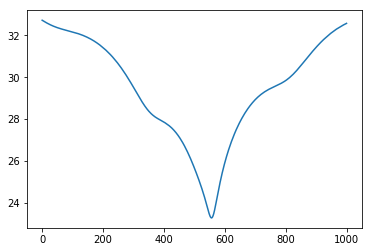

In [401]:
xad = loadtxt('magfile.txt',delimiter=',')
plot(xad[2,:])

In [328]:
savetxt('montecarlo/maglist',maglist)


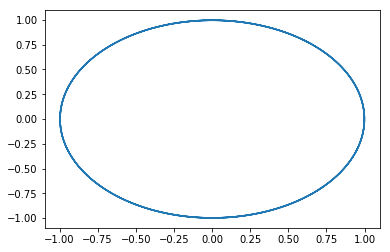

In [438]:
plot(xlist[210][0],ylist[210][0])
#plot(xlist[210][1],ylist[210][1])

In [330]:
print min(sqrt(xlist[9809][1]**2+ylist[9809][1]**2+zlist[9809][1]**2))
print where(sqrt(xlist[9809][1]**2+ylist[9809][1]**2+zlist[9809][1]**2)==min(sqrt(xlist[9809][1]**2+ylist[9809][1]**2+zlist[9809][1]**2)))[0][0]

5.44483438358
387


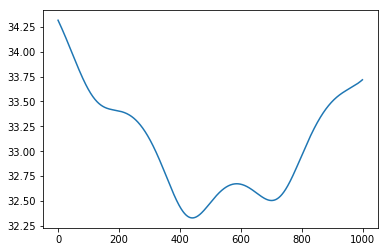

In [331]:
plot(maglist[210])

In [339]:
#for i in arange(len(maglist)):
binner = 0
binner1=0
binner2=0
daterecover=[]
monthrec=[]
monthfav=[]
for i in arange(10000):
    
    
    
    Noutputs = 1000
    year = 2.*np.pi # One year in units where G=1
    times = np.linspace(0.,3.*year, Noutputs)
    yearsec = 60*60*24*365
    if len(where(array(maglist[i])<20)[0])>2:
        idx = where(array(maglist[i])<20)[0][0]
        daterec= daterlist[i]+timedelta(seconds=times[idx]/year*yearsec)
        monthrec.append(daterec.month)
    else:
        daterec=0.
        monthrec.append(100)
    #daterecover.append(daterec)
    #print daterec.month
    #plot(maglist[i])
    #print len(where(array(maglist[i])<24)[0])
    #if maglist[i][:] <24.:
     #   binner +=1
    idperi =where(sqrt(xlist[i][1]**2+ylist[i][1]**2+zlist[i][1]**2)
                  ==min(sqrt(xlist[i][1]**2+ylist[i][1]**2+zlist[i][1]**2)))[0][0]
    idclosest = where(sqrt((xlist[i][1]-xlist[i][0])**2+(ylist[i][1]-ylist[i][0])**2
                           +(zlist[i][1]-zlist[i][0]**2))==min(sqrt((xlist[i][1]-xlist[i][0])**2+(ylist[i][1]-ylist[i][0])**2
                           +(zlist[i][1]-zlist[i][0]**2))))[0]
    
    if len(where(array(maglist[i])<20)[0]) >2:
        #print i
        binner+=1
        if idx<idperi:
            binner1+=1
        if idx<idclosest:
            binner2+=1
            monthfav.append(daterec.month)
            
                    
                      
    
print binner

print binner1
print binner2

/anaconda/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in sqrt
/anaconda/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt
/anaconda/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/anaconda/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in less


5
4
2


(array([ 0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 12 Patch objects>)

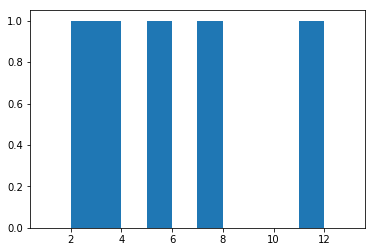

In [341]:
#plot(monthrec,'ro')
#lim([0,12])
from matplotlib import pyplot as plt 
plt.hist(monthrec, bins = [1,2,3,4,5,6,7,8,9,10,11,12,13])

2018-06-21 14:14:14.749525
25.4248414403
7.53187132092


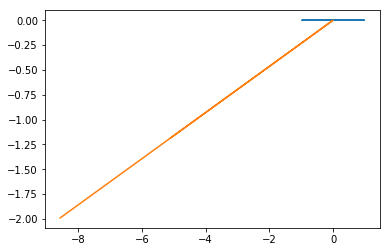

In [120]:
plot(x[0],z[0])
plot(x[1],z[1])
print dater
print vMC
print bMC

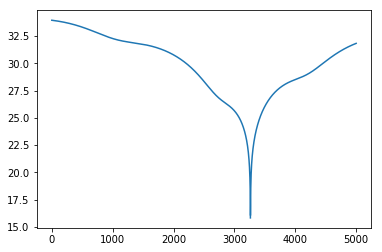

In [119]:
plot(magss)

In [509]:
#do it with earth going correct way
start = time.time()


k=0
while(k<1000000):
    k+=1
    magss,x,y,z,phiearth,vMC,bMC = doadraw2(h,xedges,yedges,hist,bin_edges)
    
    
    if len(where(array(magss)<24)[0]) >2:
        print "!"
        
        #open all files
        magfile = open("MCfiles2/magfile.txt", "a")
        datefile = open("MCfiles2/datefile.txt", "a")

        vMCfile = open("MCfiles2/vMCfile.txt", "a")
        bMCfile = open("MCfiles2/bMCfile.txt", "a")

        counterfile=open("MCfiles2/counterfile.txt", "a")

        xearthfile = open("MCfiles2/xearthfile.txt","a")
        xastfile = open("MCfiles2/xastfile.txt","a")
        yearthfile = open("MCfiles2/yearthfile.txt","a")
        yastfile = open("MCfiles2/yastfile.txt","a")
        zearthfile = open("MCfiles2/zearthfile.txt","a")
        zastfile = open("MCfiles2/zastfile.txt","a")
        
        savetxt(magfile, [magss],delimiter=',',fmt='%1.3f')
        #print str(dater)
        savetxt(datefile,[phiearth],fmt='%1.3f')
        savetxt(vMCfile,[vMC],fmt='%1.3f')
        savetxt(bMCfile,[bMC],fmt='%1.3f')
        
        savetxt(counterfile,[k],fmt='%1.3f')
        savetxt(xearthfile,[x[0,:]],delimiter=',')#,fmt='%1.3f')
        savetxt(xastfile,[x[1,:]],delimiter=',')#,fmt='%1.3f')
        savetxt(yearthfile,[y[0,:]],delimiter=',')#,fmt='%1.3f')
        savetxt(yastfile,[y[1,:]],delimiter=',')#,fmt='%1.3f')
        savetxt(zearthfile,[z[0,:]],delimiter=',')#,fmt='%1.3f')
        savetxt(zastfile,[z[1,:]],delimiter=',')#,fmt='%1.3f')
        magfile.close()
        datefile.close()
        xearthfile.close()
        xastfile.close()
        yearthfile.close()
        yastfile.close()
        zearthfile.close()
        zastfile.close()
        vMCfile.close()
        bMCfile.close()
        counterfile.close()
    if (k%10000==0):
        print('k=',k)

end = time.time()
print(end - start)

!


/anaconda/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  
/anaconda/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
('k=', 10000)
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


In [510]:
print k

1000000


In [ ]:
#do it again
#do it with earth going correct way
start = time.time()


k=1000000
while(k<5000000):
    k+=1
    magss,x,y,z,phiearth,vMC,bMC = doadraw2(h,xedges,yedges,hist,bin_edges)
    
    
    if len(where(array(magss)<24)[0]) >2:
        print "!"
        
        #open all files
        magfile = open("MCfiles2/magfile.txt", "a")
        datefile = open("MCfiles2/datefile.txt", "a")

        vMCfile = open("MCfiles2/vMCfile.txt", "a")
        bMCfile = open("MCfiles2/bMCfile.txt", "a")

        counterfile=open("MCfiles2/counterfile.txt", "a")

        xearthfile = open("MCfiles2/xearthfile.txt","a")
        xastfile = open("MCfiles2/xastfile.txt","a")
        yearthfile = open("MCfiles2/yearthfile.txt","a")
        yastfile = open("MCfiles2/yastfile.txt","a")
        zearthfile = open("MCfiles2/zearthfile.txt","a")
        zastfile = open("MCfiles2/zastfile.txt","a")
        
        savetxt(magfile, [magss],delimiter=',',fmt='%1.3f')
        #print str(dater)
        savetxt(datefile,[phiearth],fmt='%1.3f')
        savetxt(vMCfile,[vMC],fmt='%1.3f')
        savetxt(bMCfile,[bMC],fmt='%1.3f')
        
        savetxt(counterfile,[k],fmt='%1.3f')
        savetxt(xearthfile,[x[0,:]],delimiter=',')#,fmt='%1.3f')
        savetxt(xastfile,[x[1,:]],delimiter=',')#,fmt='%1.3f')
        savetxt(yearthfile,[y[0,:]],delimiter=',')#,fmt='%1.3f')
        savetxt(yastfile,[y[1,:]],delimiter=',')#,fmt='%1.3f')
        savetxt(zearthfile,[z[0,:]],delimiter=',')#,fmt='%1.3f')
        savetxt(zastfile,[z[1,:]],delimiter=',')#,fmt='%1.3f')
        magfile.close()
        datefile.close()
        xearthfile.close()
        xastfile.close()
        yearthfile.close()
        yastfile.close()
        zearthfile.close()
        zastfile.close()
        vMCfile.close()
        bMCfile.close()
        counterfile.close()
    if (k%10000==0):
        print('k=',k)

end = time.time()
print(end - start)

!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


/anaconda/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  
/anaconda/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
('k=', 1010000)
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
('k=', 1020000)
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


In [508]:
#differences - coord system correct - only to 5 AU
def doadraw2(h,xedges,yedges,hist,bin_edges):
    k=0
    year = 60*60*24*365
    while(k==0):
        xd=xedges[-1]*random.random()
        yd = (random.random()-.5)*2.*yedges[-1]
        xidx = (abs(xedges-xd)).argmin()
        yidx = (abs(yedges-yd)).argmin()
        if (xidx<50) and (yidx<50):
            thresh= h[xidx,yidx]
            throwout=random.random()*amax(h)
            if throwout<thresh:
                break
#xd and yd are the ra and dec in degrees of the incoming trajectory

    xd = xd+180.
    yd = yd+90
    #choose a speed from the distribution
    k=0
    while(k==0):
        vMC=bin_edges[-2]*random.random()
        idx = (abs(bin_edges-vMC)).argmin()
        thresh= hist[idx]
        throwout=random.random()*amax(hist)
        if throwout<thresh:
            break
    #choose an impact parameter from b^2

    k=0
    while(k==0):
        bMC=5.*random.random()
        #idx = (abs(bin_edges-vMC)).argmin()
        thresh= bMC*bMC
        throwout=random.random()*5.*5.
        if throwout<thresh:
            break
    psi = random.random()*2.*pi
    # choose a start date and position for the earth
    phiearth = random.random()*2.*pi
    date = datetime.datetime(2017, 9, 21, 0, 0)
    date1 = date+timedelta(seconds=year*phiearth/(2.*pi))
    xearth = cos(phiearth)*1.
    yearth = -sin(phiearth)*1.
    zearth = 0.
    
    vearth = year/(AU*2.*pi)*29.8*array([-sin(phiearth),-cos(phiearth),0.])
    phi =radians(xd)
    theta = radians(yd)
    
    xast = 5.*cos(phi)*sin(theta)
    yast = 5.*sin(phi)*sin(theta)
    zast = 5.*cos(theta)
    
    xast1,yast1,zast1 = get_pos(xast,yast,zast,bMC,psi)
    GGM = 1.327e11
    AU1=1.49597892e13/1e5 
    deltav =  sqrt(2.*GGM/(sqrt(5.*5.+bMC*bMC)*AU1))
    vboost = vMC+deltav
    
    vast = -vboost*1./sqrt(xast*xast+yast*yast+zast*zast)*array([xast,yast,zast])
    sim = rebound.Simulation()
    #sim.add("Sun", date=date1)
    #sim.add("Earth", date=date1)
    #sim.add(m=3e-6,r=5e-5,a=1,e=0.05,f=np.pi,hash='earth')
    sim.add(m=1.e-3,x=xearth,y=yearth,z=zearth,vx=vearth[0]
            ,vy=vearth[1],vz=vearth[2],hash='earth')
    sim.add(m=1.,x=0.,y=0.,z=0.,vx=0.,vy=0.,vz=0.,hash="sun",date=date1)
    #sim.add(m=0.,x=1.,y=0.,z=0.,vx=0.,vy=0.,vz=0.,hash="earth",date=date1)
    sim.add(m=0.,x=xast1,y=yast1,z=zast1,vx=vast[0]*year/(AU*2.*pi),vy=vast[1]*year/(AU*2.*pi)
        ,vz=vast[2]*year/(AU*2.*pi),
        hash="asteroid",date=date1)
    Noutputs = 1000
    year = 2.*np.pi # One year in units where G=1
    times = np.linspace(0.,3.*year, Noutputs)
    x = np.zeros((2,Noutputs))
    y = np.zeros((2,Noutputs))
    z = np.zeros((2,Noutputs))
    sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
    sim.move_to_com()        # We always move to the center of momentum frame before an integration
    ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs
    mags=[]
  
    
    for i,time in enumerate(times):
        sim.integrate(time)
        x[0][i] = ps[0].x   # This stores the data which allows us to plot it later
        y[0][i] = ps[0].y
        z[0][i] = ps[0].z
    
        x[1][i] = ps[2].x
        y[1][i] = ps[2].y
        z[1][i] = ps[2].z
        magarray = getmag(22.4,sqrt(x[1][i]**2+y[1][i]**2+z[1][i]**2),
                 sqrt((x[1][i]-x[0][i])**2+(y[1][i]-y[0][i])**2+(z[1][i]-z[0][i])**2),1.)
        mags.append(magarray)
    return(mags,x,y,z,phiearth,vMC,bMC)